<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/unsupervised_learning/unsupervised_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

X_faces, y_faces = fetch_olivetti_faces(shuffle=True,return_X_y = True, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_faces, y_faces, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(X)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

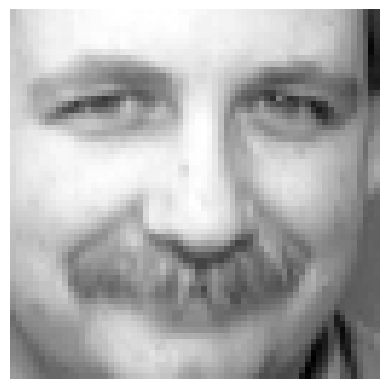

In [ ]:
plt.imshow(X_train[6].reshape(64, 64), cmap = "gray")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.475

In [ ]:
log_reg_full = LogisticRegression(max_iter = 10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9875

In [ ]:
k = 50
kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 20)
X_faces_dist = kmeans.fit_transform(X_train)
representative_face_idx = np.argmin(X_faces_dist, axis = 0)
X_representative_faces = X_train[representative_face_idx]

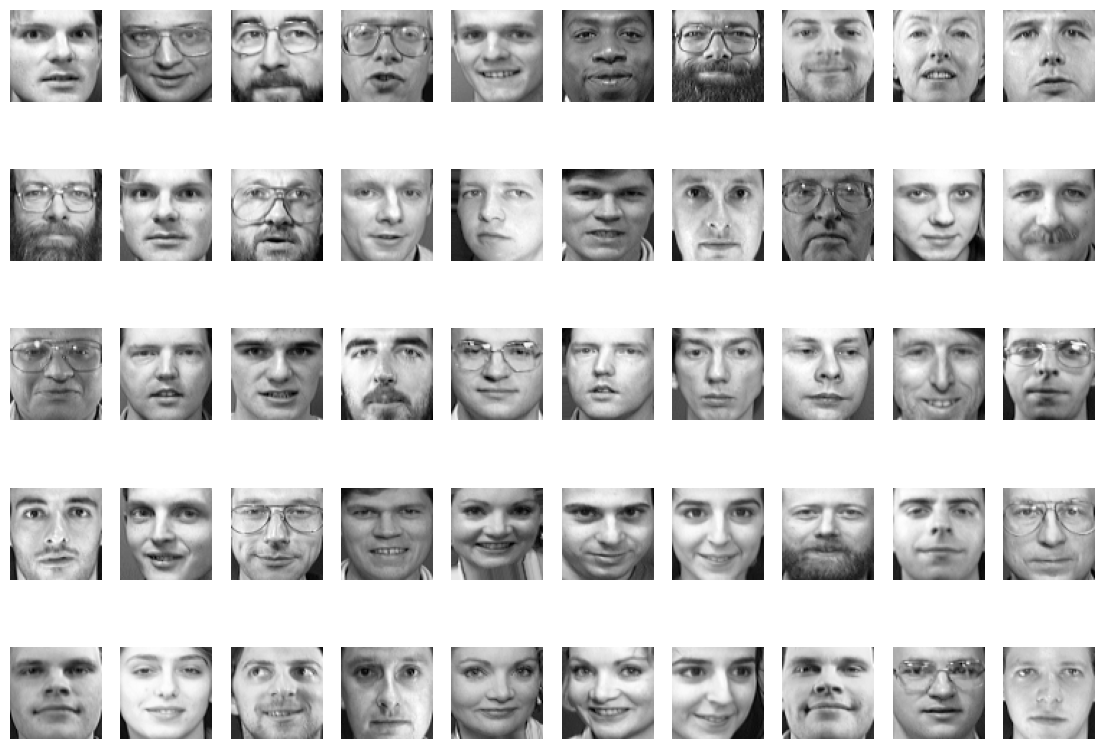

In [ ]:
plt.figure(figsize = (14, 10))
plt.gray()

for index, X_representative_face in enumerate(X_representative_faces):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_face.reshape(64, 64), cmap = "gray")
    plt.axis('off')

plt.show()

In [ ]:
y_representative_faces = np.arange(len(X_representative_faces))

In [ ]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_representative_faces, y_representative_faces)
log_reg.score(X_test, y_test)

0.0375

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_faces[i]

In [ ]:
log_reg= LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.0125

In [ ]:
(y_train_propagated == y_train).mean()

0.0375

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propageted = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg= LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train_partially_propageted, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.0125